In [1]:
!mkdir data
%cd data

/content/data


In [2]:
!unzip /content/images.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/Cotton Disease Dataset/Training/Bacterial blight/shuffled_249.jpg  
  inflating: /content/data/Cotton Disease Dataset/Training/Bacterial blight/shuffled_25.jpg  
  inflating: /content/data/Cotton Disease Dataset/Training/Bacterial blight/shuffled_250.jpg  
  inflating: /content/data/Cotton Disease Dataset/Training/Bacterial blight/shuffled_251.jpg  
  inflating: /content/data/Cotton Disease Dataset/Training/Bacterial blight/shuffled_252.jpg  
  inflating: /content/data/Cotton Disease Dataset/Training/Bacterial blight/shuffled_254.jpg  
  inflating: /content/data/Cotton Disease Dataset/Training/Bacterial blight/shuffled_255.jpg  
  inflating: /content/data/Cotton Disease Dataset/Training/Bacterial blight/shuffled_256.jpg  
  inflating: /content/data/Cotton Disease Dataset/Training/Bacterial blight/shuffled_257.jpg  
  inflating: /content/data/Cotton Disease Dataset/Training/Bacterial blight/shuffled_258.jpg  


58889256/58889256 [==============================] - 4s 0us/step
Found 1280 images belonging to 8 classes.
40/40 [==============================] - 4s 52ms/step


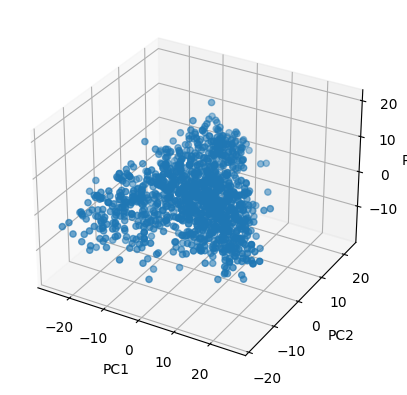

In [5]:
# Install any required packages if necessary
# !pip install sklearn

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.decomposition import PCA

# Assuming your model and data loader are set up
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)

# Example of using a data generator (adjust paths accordingly)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
generator = datagen.flow_from_directory(
    '/content/data/Cotton Disease Dataset/Validation',
    target_size=(256, 256),
    batch_size=32,
    class_mode=None,
    shuffle=False  # Important for matching labels and outputs
)

# Extract features
features = model.predict(generator, verbose=1)

# Reduce dimensions
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features.reshape(features.shape[0], -1))

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()
